# Trabalho de Análise de Dados

# Dataset de Empenhos da Cultura Cearense

> - Curso: Mestrado
> - Programa: MDCC - UFC
> - Disciplina: Introdução à Ciência de Dados
> - Professor: José Maria
> - Estudante: Renato Freitas

## OBJETIVO

> Fazer uma análise estatística e exploratórioa dos dados de empenhos da Cultura de todos os municípios cearenses nos últimos quatro anos.

> - Medidas de Tendência Central e Medidas de Dispersão
> - Tabela de Frequência e Histograma
> - Distribuição dos Dados

In [7]:
import requests
from bs4 import BeautifulSoup
import datetime as dt
from datetime import timezone
import csv
import pandas as pd
import numpy as np
import json
import logging
import time
import math
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

## Ler o arquivo .csv

In [12]:
empenhos = pd.read_csv("../ExtracaoDeDados/Empenhos/empenhos_m.csv", low_memory=False)

In [13]:
empenhos.head()

,codigo_municipio,exercicio_orcamento,codigo_orgao,codigo_unidade,data_emissao_empenho,numero_empenho,data_referencia_empenho,codigo_funcao,codigo_subfuncao,codigo_programa,...,cep_negociante,nome_municipio_negociante,codigo_uf,tipo_fonte,codigo_fonte,situacao_favorecido,data_situacao,atividade_principal_texto,atividade_principal_codigo,nome_municipio
0,2,201700,6,1,2017-01-02 00:00:00,02010005,201701,13,122,30,...,63240000,Abaiara,CE,1,1,NaN,NaN,NaN,NaN,ABAIARA
1,2,201800,6,1,2018-01-03 00:00:00,03010004,201801,13,122,30,...,63190000,Santana do Cariri,CE,1,1,NaN,NaN,NaN,NaN,ABAIARA
2,2,201800,6,1,2018-01-02 00:00:00,02010131,201801,13,122,30,...,63041155,Juazeiro do Norte,CE,1,1,ATIVA,13/11/2006,Serviços de comunicação multimídia - SCM,61.10-8-03,ABAIARA
3,2,201800,6,1,2018-01-02 00:00:00,02010019,201801,13,122,30,...,63240000,Abaiara,CE,1,1,NaN,NaN,NaN,NaN,ABAIARA
4,2,201900,6,1,2019-01-02 00:00:00,02010112,201901,13,122,30,...,63240000,ABAIARA,CE,1,1000000,ATIVA,03/11/2005,Administração pública em geral,84.11-6-00,ABAIARA


In [14]:
empenhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20745 entries, 0 to 20744
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   codigo_municipio                 20745 non-null  int64  
 1   exercicio_orcamento              20745 non-null  int64  
 2   codigo_orgao                     20745 non-null  int64  
 3   codigo_unidade                   20745 non-null  int64  
 4   data_emissao_empenho             20745 non-null  object 
 5   numero_empenho                   20745 non-null  object 
 6   data_referencia_empenho          20745 non-null  int64  
 7   codigo_funcao                    20745 non-null  int64  
 8   codigo_subfuncao                 20745 non-null  int64  
 9   codigo_programa                  20745 non-null  int64  
 10  codigo_projeto_atividade         20745 non-null  int64  
 11  numero_projeto_atividade         20745 non-null  int64  
 12  numero_subprojeto_

## Manter features relevantes

In [18]:
features = ['codigo_municipio','nome_municipio','codigo_orgao', 'codigo_unidade', 
            'data_emissao_empenho', 'numero_empenho', 'codigo_funcao', 'codigo_subfuncao', 'codigo_programa',
         'codigo_elemento_despesa', 'modalidade_empenho', 'descricao_empenho', 
         'valor_anterior_saldo_dotacao', 'valor_empenhado', 'tipo_processo_licitatorio', 
         'numero_documento_negociante', 'estado_empenho','codigo_tipo_negociante', 
         'nome_negociante', 'situacao_favorecido', 'data_situacao', 'atividade_principal_texto',
         'atividade_principal_codigo']
df = empenhos.loc[:, features]
df.shape

(20745, 23)

## Cópia de segurança

In [19]:
dataset = df.copy()

## Limpar os dados ou Pré-processamento dos dados
- Tratar valores incosistentes
- Tratar valores faltantes
- Escalonamento de atributos
- Transformação de variáveis categóricas

### Dados que estão no tipo int64 que são categóricos
- codigo_orgao
- codigo_unidade
- codigo_funcao                   
- codigo_subfuncao              
- codigo_programa    
- codigo_elemento_despesa
- numero_documento_negociante 
- cd_cpf_gestor
- codigo_tipo_negociante

### Dados estão no tipo object que são categóricos
- numero_empenho
- modalidade_empenho ['E','O','G']
- tipo_processo_licitatorio ['F', 'N']     
- estado_empenho ['AP','OR']

## Verificar dados faltantes

In [20]:
dataset.isnull().sum()

codigo_municipio                   0
nome_municipio                     0
codigo_orgao                       0
codigo_unidade                     0
data_emissao_empenho               0
numero_empenho                     0
codigo_funcao                      0
codigo_subfuncao                   0
codigo_programa                    0
codigo_elemento_despesa            0
modalidade_empenho                 0
descricao_empenho                  0
valor_anterior_saldo_dotacao       0
valor_empenhado                    0
tipo_processo_licitatorio          0
numero_documento_negociante        0
estado_empenho                     0
codigo_tipo_negociante             0
nome_negociante                    0
situacao_favorecido             8030
data_situacao                   8030
atividade_principal_texto       8047
atividade_principal_codigo      8047
dtype: int64

- ### Dados faltantes em 'data_situacao'

In [21]:
dataset.loc[dataset['data_situacao'].notna() == True, 'data_situacao'] = pd.to_datetime(dataset['data_situacao'], utc=True)

In [22]:
dataset['data_situacao'] = pd.to_datetime(dataset['data_situacao'])
dataset['data_situacao'] = dataset['data_situacao'].astype('datetime64[ns]')

In [23]:
assert dataset['data_situacao'].dtype == 'datetime64[ns]'
dataset['data_situacao']

0              NaT
1              NaT
2       2006-11-13
3              NaT
4       2005-03-11
           ...    
20740   2005-03-11
20741   2005-03-11
20742   2007-07-12
20743   2014-11-11
20744   2017-05-05
Name: data_situacao, Length: 20745, dtype: datetime64[ns]

## Tratando das datas: transformando string em datetime

In [24]:
dataset['data_emissao_empenho'] = pd.to_datetime(dataset['data_emissao_empenho'])

In [25]:
assert dataset['data_emissao_empenho'].dtype == 'datetime64[ns]'
dataset['data_emissao_empenho']

0       2017-01-02
1       2018-01-03
2       2018-01-02
3       2018-01-02
4       2019-01-02
           ...    
20740   2020-01-02
20741   2020-01-06
20742   2020-01-13
20743   2020-01-13
20744   2020-01-20
Name: data_emissao_empenho, Length: 20745, dtype: datetime64[ns]

### Tratando siglas: transformando string em tipo CATEGORY do pandas/python

In [29]:
for coluna in ['tipo_processo_licitatorio', 'modalidade_empenho', 'estado_empenho']:
    dataset[coluna] = dataset[coluna].astype('category')
    
categoricos = dataset[['tipo_processo_licitatorio', 'modalidade_empenho', 'estado_empenho']]
categoricos

,tipo_processo_licitatorio,modalidade_empenho,estado_empenho
0,F,E,AP
1,F,O,OR
2,N,G,OR
3,F,E,AP
4,F,E,OR
...,...,...,...
20740,F,E,AT
20741,F,O,OR
20742,R,G,AP
20743,R,G,AP


In [30]:
categoricos.dtypes

tipo_processo_licitatorio    category
modalidade_empenho           category
estado_empenho               category
dtype: object

In [31]:
dataset.describe()

,codigo_municipio,codigo_orgao,codigo_unidade,codigo_funcao,codigo_subfuncao,codigo_programa,codigo_elemento_despesa,valor_anterior_saldo_dotacao,valor_empenhado,numero_documento_negociante,codigo_tipo_negociante
count,20745.000000,20745.000000,20745.000000,20745.000000,20745.000000,20745.000000,2.074500e+04,2.074500e+04,2.074500e+04,2.074500e+04,20745.000000
mean,91.988190,9.429115,4.586358,11.508894,244.082333,320.030465,3.371498e+07,2.772120e+05,5.168450e+04,8.914097e+12,1.889708
std,49.879914,6.745233,14.353882,5.591147,166.461074,748.416135,1.678175e+06,5.753004e+05,2.980531e+05,1.278340e+13,1.641948
min,2.000000,1.000000,0.000000,3.000000,91.000000,1.000000,3.190010e+07,-4.450501e+05,5.400000e-01,1.910000e+02,1.000000
25%,50.000000,5.000000,1.000000,8.000000,122.000000,7.000000,3.390300e+07,2.500000e+04,1.000000e+03,6.666667e+10,1.000000
50%,90.000000,9.000000,1.000000,12.000000,122.000000,35.000000,3.390360e+07,8.674567e+04,3.240000e+03,5.282559e+12,1.000000
75%,137.000000,11.000000,3.000000,13.000000,368.000000,251.000000,3.390390e+07,2.832423e+05,1.600000e+04,1.179293e+13,2.000000
max,185.000000,44.000000,101.000000,28.000000,846.000000,9904.000000,4.690710e+07,1.500000e+07,9.000000e+06,9.754973e+13,7.000000


## Verificar se existe empenhos duplicados

In [32]:
duplicados = dataset.duplicated()
df_empenhos_duplicados = dataset[duplicados]
df_empenhos_duplicados

,codigo_municipio,nome_municipio,codigo_orgao,codigo_unidade,data_emissao_empenho,numero_empenho,codigo_funcao,codigo_subfuncao,codigo_programa,codigo_elemento_despesa,...,valor_empenhado,tipo_processo_licitatorio,numero_documento_negociante,estado_empenho,codigo_tipo_negociante,nome_negociante,situacao_favorecido,data_situacao,atividade_principal_texto,atividade_principal_codigo
188,7,ALCANTARAS,12,1,2017-01-02,02010047,4,122,5,31901300,...,46200.00,F,29979036004480,AP,1,INSTITUTO NACIONAL DO SEGURO SOCIAL,ATIVA,2005-03-11,Seguridade social obrigatória,84.30-2-00
189,7,ALCANTARAS,12,1,2017-01-10,10010011,4,122,5,31909200,...,9055.71,F,7598626000190,OR,1,FOLHA DE PAGAMENTO,ATIVA,2005-03-11,Administração pública em geral,84.11-6-00
190,7,ALCANTARAS,12,1,2017-01-27,27010001,4,122,5,33903000,...,479.80,F,12671108000195,OR,1,JOSÉ AMAURY LOPES TABOSA - ME,BAIXADA,2018-10-15,********,00.00-0-00
191,7,ALCANTARAS,12,1,2017-01-30,30010029,4,122,5,31901100,...,17884.37,F,66666666666,OR,6,FOLHA DE PAGAMENTO - SECRETARIA DE CULTURA,NaN,NaT,NaN,NaN
192,7,ALCANTARAS,12,2,2017-01-02,02010048,13,392,22,31901300,...,11550.00,F,29979036004480,AP,1,INSTITUTO NACIONAL DO SEGURO SOCIAL,ATIVA,2005-03-11,Seguridade social obrigatória,84.30-2-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20634,184,ITAITINGA,8,1,2020-01-17,17010012,13,122,7,33903900,...,47.38,F,7047251000170,OR,1,ENEL - COMPANHIA ENERGETICA DO CEARA,ATIVA,2005-03-11,Distribuição de energia elétrica,35.14-0-00
20635,184,ITAITINGA,8,1,2020-01-24,24010006,13,122,7,33903900,...,1400.00,F,31529891000100,OR,1,ROBERTO GOMES MONTE 02722574357,ATIVA,2018-09-17,"Manutenção e reparação de geradores, transform...",33.13-9-01
20636,184,ITAITINGA,8,1,2020-01-31,31010005,13,122,7,33903900,...,4530.00,N,26033638000112,OR,1,SERRA EVOLUTE LOCAÇÃO E LIMPEZA LTDA,ATIVA,2016-08-24,Coleta de resíduos perigosos,38.12-2-00
20637,184,ITAITINGA,8,1,2020-01-31,31010021,13,122,7,33903900,...,1000.00,F,34644654000170,OR,1,FRANCISCO CRISTIANO NASCIMENTO DOS SANTOS,ATIVA,2019-08-23,"Edição de cadastros, listas e de outros produt...",58.19-1-00


# Remover empenhos duplicados

In [33]:
dataset.drop_duplicates(inplace = True)
dataset.shape

(17521, 23)

# ANÁLISE ESTATÍSTICA E EXPLORATÓRIA

Medidas de Tendência Central ou Estimativa de Parâmetro

## Qual a média dos empenhos

In [34]:
empenhoMedio = dataset['valor_empenhado'].mean()
print('Média dos empenhos:', empenhoMedio)

Média dos empenhos: 53711.089645568194


In [35]:
# Criando nova coluna 'ano' para obter a média dos empenhos por ano
dataset['ano'] = dataset['data_emissao_empenho'].map(lambda x: str(x).split('-')[0])

In [36]:
mr = dataset.groupby('ano').mean().reset_index()

print('Média dos empenhos por ano')
for i in mr.index:
    ano = mr.iloc[i]['ano']
    valor = mr.iloc[i]['valor_empenhado']
    print("{}: {}".format(ano, valor))

Média dos empenhos por ano
2017: 60225.43267313019
2018: 59090.52218973055
2019: 52945.8256893939
2020: 46099.17257684628


## Qual a mediana dos empenhos

In [37]:
mediana = dataset['valor_empenhado'].median()
print('Mediana dos empenhos:', mediana)

Mediana dos empenhos: 3300.0


In [38]:
print('Mediana dos empenhos por ano')

mr = dataset.groupby('ano').median().reset_index()

for i in mr.index:
    ano = mr.iloc[i]['ano']
    valor = mr.iloc[i]['valor_empenhado']
    print("{}: {}".format(ano, valor))

Mediana dos empenhos por ano
2017: 3991.65
2018: 3452.16
2019: 3000.0
2020: 3368.23


## Qual o desvio padrão dos empenhos
O desvio é o resultado do valor observado menos a média

In [39]:
empenhoDesvio = dataset['valor_empenhado'].apply(lambda valor: valor - empenhoMedio)
empenhoDesvio

0         5838.910354
1       -52161.089646
2       -52676.089646
3          483.910354
4       -48711.089646
             ...     
20740   -40711.089646
20741   -49780.929646
20742   -48156.289646
20743   -49549.739646
20744   -51279.889646
Name: valor_empenhado, Length: 17521, dtype: float64

## Desvio médio absoluto

In [40]:
soma = 0
n = dataset.shape[0] # tamanho do dataset

for i in range(n):
    soma += abs(dataset['valor_empenhado'].iloc[i] - empenhoMedio)
print('Desvio Médio Absoluto:', soma/n)

Desvio Médio Absoluto: 80874.6666755944


In [41]:
# Desvio médio absoluto usando o Pandas
dataset['valor_empenhado'].mad()

80874.6666755944

## Qual a variância dos empenhos

In [42]:

dataset['valor_empenhado'].var()

95945679962.75475

## Qual o Desvio Padrão

In [43]:

dataset['valor_empenhado'].std()

309750.99670986494

## Bloxpot

<AxesSubplot:>

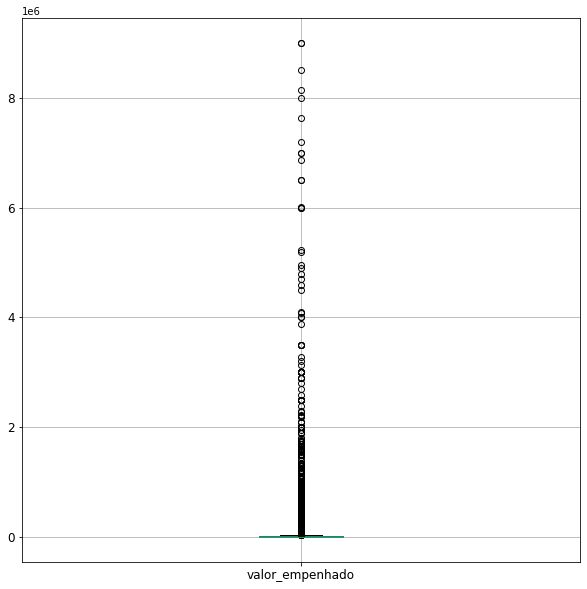

In [44]:

dataset.boxplot(column=['valor_empenhado'], fontsize='large', figsize=(10,10))

<AxesSubplot:title={'center':'valor_empenhado'}, xlabel='ano'>

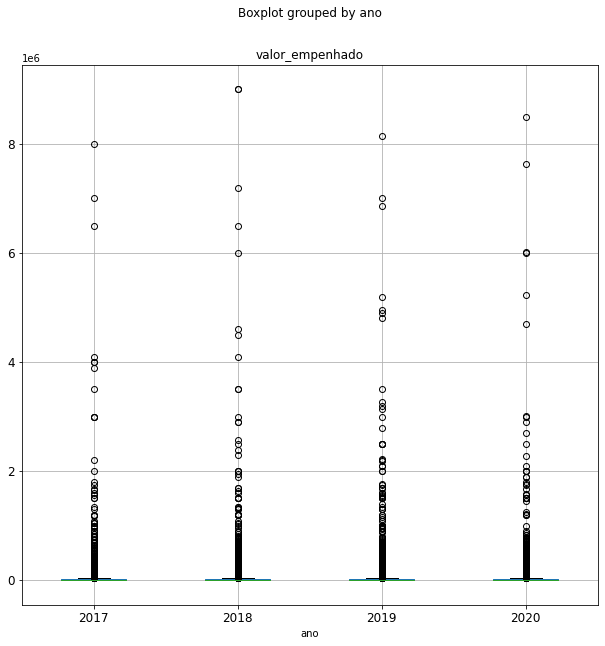

In [45]:
dataset.boxplot(by='ano', column=['valor_empenhado'], fontsize='large', figsize=(10,10))

# Tabela de Frequência

In [47]:
# Obter o número de classes/grupos (bins)
# O número de intervalos não deve ultrapassar 20
n = dataset.shape[0]

k1 = math.ceil(1 + 3.3 * math.log10(n))
k2 = int(math.sqrt(n))

print('Tamanho do dataset, n: ', n)
print('Fórmula de Sturges, k1: ',k1)
print('Fórmula da raiz quadrada, k2: ',k2)

Tamanho do dataset, n:  17521
Fórmula de Sturges, k1:  16
Fórmula da raiz quadrada, k2:  132


In [48]:
# escolhendo o k
k = k1 if k1 < k2 else k2
print('Escolhido, k:', k)

Escolhido, k: 16


(array([1.7226e+04, 1.5000e+02, 5.6000e+01, 3.2000e+01, 1.2000e+01,
        1.3000e+01, 5.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00]),
 array([5.40000000e-01, 5.62500506e+05, 1.12500047e+06, 1.68750044e+06,
        2.25000041e+06, 2.81250037e+06, 3.37500034e+06, 3.93750030e+06,
        4.50000027e+06, 5.06250024e+06, 5.62500020e+06, 6.18750017e+06,
        6.75000014e+06, 7.31250010e+06, 7.87500007e+06, 8.43750003e+06,
        9.00000000e+06]),
 <BarContainer object of 16 artists>)

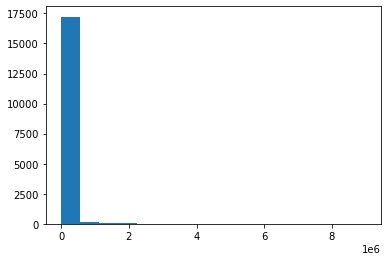

In [49]:
plt.hist(dataset['valor_empenhado'], bins=k)

## Aplicando a Trasnformação Logarítmica

(array([   6.,   13.,   45.,  102.,  405.,  943., 2162., 3805., 3245.,
        2514., 1783., 1386.,  654.,  313.,  111.,   34.]),
 array([-0.61618614,  0.42312144,  1.46242902,  2.5017366 ,  3.54104418,
         4.58035176,  5.61965934,  6.65896692,  7.6982745 ,  8.73758208,
         9.77688966, 10.81619724, 11.85550482, 12.8948124 , 13.93411998,
        14.97342756, 16.01273514]),
 <BarContainer object of 16 artists>)

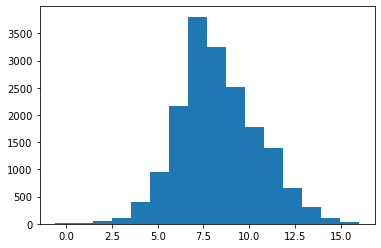

In [55]:
plt.hist(np.log(dataset['valor_empenhado']), bins=k)

# Quais tipos de empenhos e os significados das features
 O link a seguir trata-se do Manual do Sistema de Informações do TCE. Nele está contido o dicionário dos campos das Nota de Empenho:
 
 https://www.tce.ce.gov.br/downloads/ASCOM/Pdfs/manual_sim_2019.pdf
 

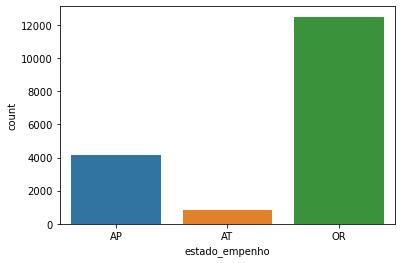

In [52]:
import  seaborn as sns
sns.countplot(x=dataset['estado_empenho']);

In [53]:
# “F”, para Dispensa de Licitação (Nos casos previstos no  art.  24,  incisos  I  e  II,  Lei  8666,  
#      que  faculta  o envio do processo administrativo). 
# “D”, para Dispensa de Licitação (EXCETO os casos previstos no art. 24, incisos I e II, Lei 8666). 
# “I”, para Inexigibilidade de Licitação 
# “R”, para utilizar Ata de Registro de Preços 
# “N”, para Processo Licitatório ''
# “P”, para Regras Próprias de Organismos Internacionais 

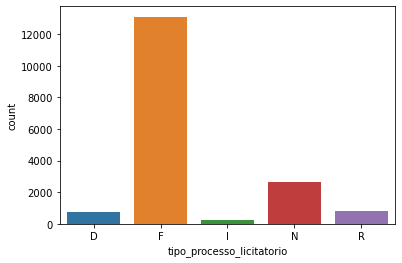

In [54]:
sns.countplot(x=dataset['tipo_processo_licitatorio']);

In [42]:
# “O”, para empenho Ordinário 
# “G”, para empenho Global 
# “E”, para empenho Estimativo 

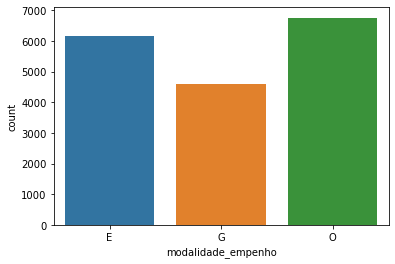

In [43]:
sns.countplot(x = dataset['modalidade_empenho']);

In [56]:
dt_copy = dataset.copy()
# np.unique(dt_copy[nome], return_counts=True)

# AGRUPANDO EMPENHOS POR MUNICÍPIO

In [57]:
codigos_municipio = dt_copy.groupby('codigo_municipio').count()
codigos_municipio.index

Int64Index([  2,   3,   4,   5,   7,   8,   9,  10,  11,  12,
            ...
            176, 177, 178, 179, 180, 181, 182, 183, 184, 185],
           dtype='int64', name='codigo_municipio', length=179)

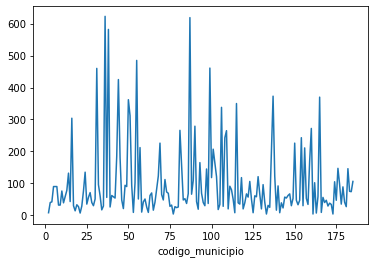

In [58]:
qtde_empenhos_por_municipio = dt_copy.groupby('codigo_municipio').count()['valor_empenhado']
qtde_empenhos_por_municipio.plot();

In [59]:
somas_valores_empenhos_por_municipio = dt_copy.groupby('codigo_municipio').sum()['valor_empenhado']
somas_valores_empenhos_por_municipio

codigo_municipio
2        194330.00
3        262017.34
4       2998011.92
5       1368134.65
7       1803053.61
          ...     
181      222025.48
182      737431.47
183      513259.58
184      264621.42
185    20566933.02
Name: valor_empenhado, Length: 179, dtype: float64

Text(0.5, 1.0, 'Relação Município x Gastos')

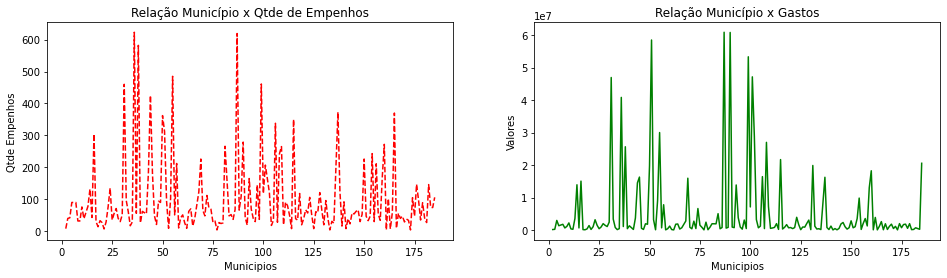

In [60]:
width = 16
heigth = 4
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(width, heigth))
ax[0].plot(qtde_empenhos_por_municipio, 'r--')
ax[1].plot(somas_valores_empenhos_por_municipio, 'g-')
# ax.plot(codigos_municipio, somas_valores_empenhos_por_municipio, 'r--')
ax[0].set_xlabel('Municipios')
ax[0].set_ylabel('Qtde Empenhos')
ax[0].set_title('Relação Município x Qtde de Empenhos')

ax[1].set_xlabel('Municipios')
ax[1].set_ylabel('Valores')
ax[1].set_title('Relação Município x Gastos')

In [69]:
sumarios = {'valor_empenhado': 'sum'}
empenhos_agrupado_por_municipio = dt_copy.groupby(by = 'nome_municipio').agg(sumarios).reset_index()

# Em ordem decrescente
empenhos_agrupado_por_municipio.sort_values(by='valor_empenhado', ascending=False)

,nome_municipio,valor_empenhado
86,ITATIRA,60864442.94
89,JAGUARIBE,60803913.20
50,CRUZ,58481544.96
99,MARACANAU,53319252.70
101,MARCO,47150880.62
...,...,...
58,FRECHEIRINHA,99820.00
172,UMARI,94065.00
162,SOLONOPOLE,92593.27
62,GRANJEIRO,88072.00


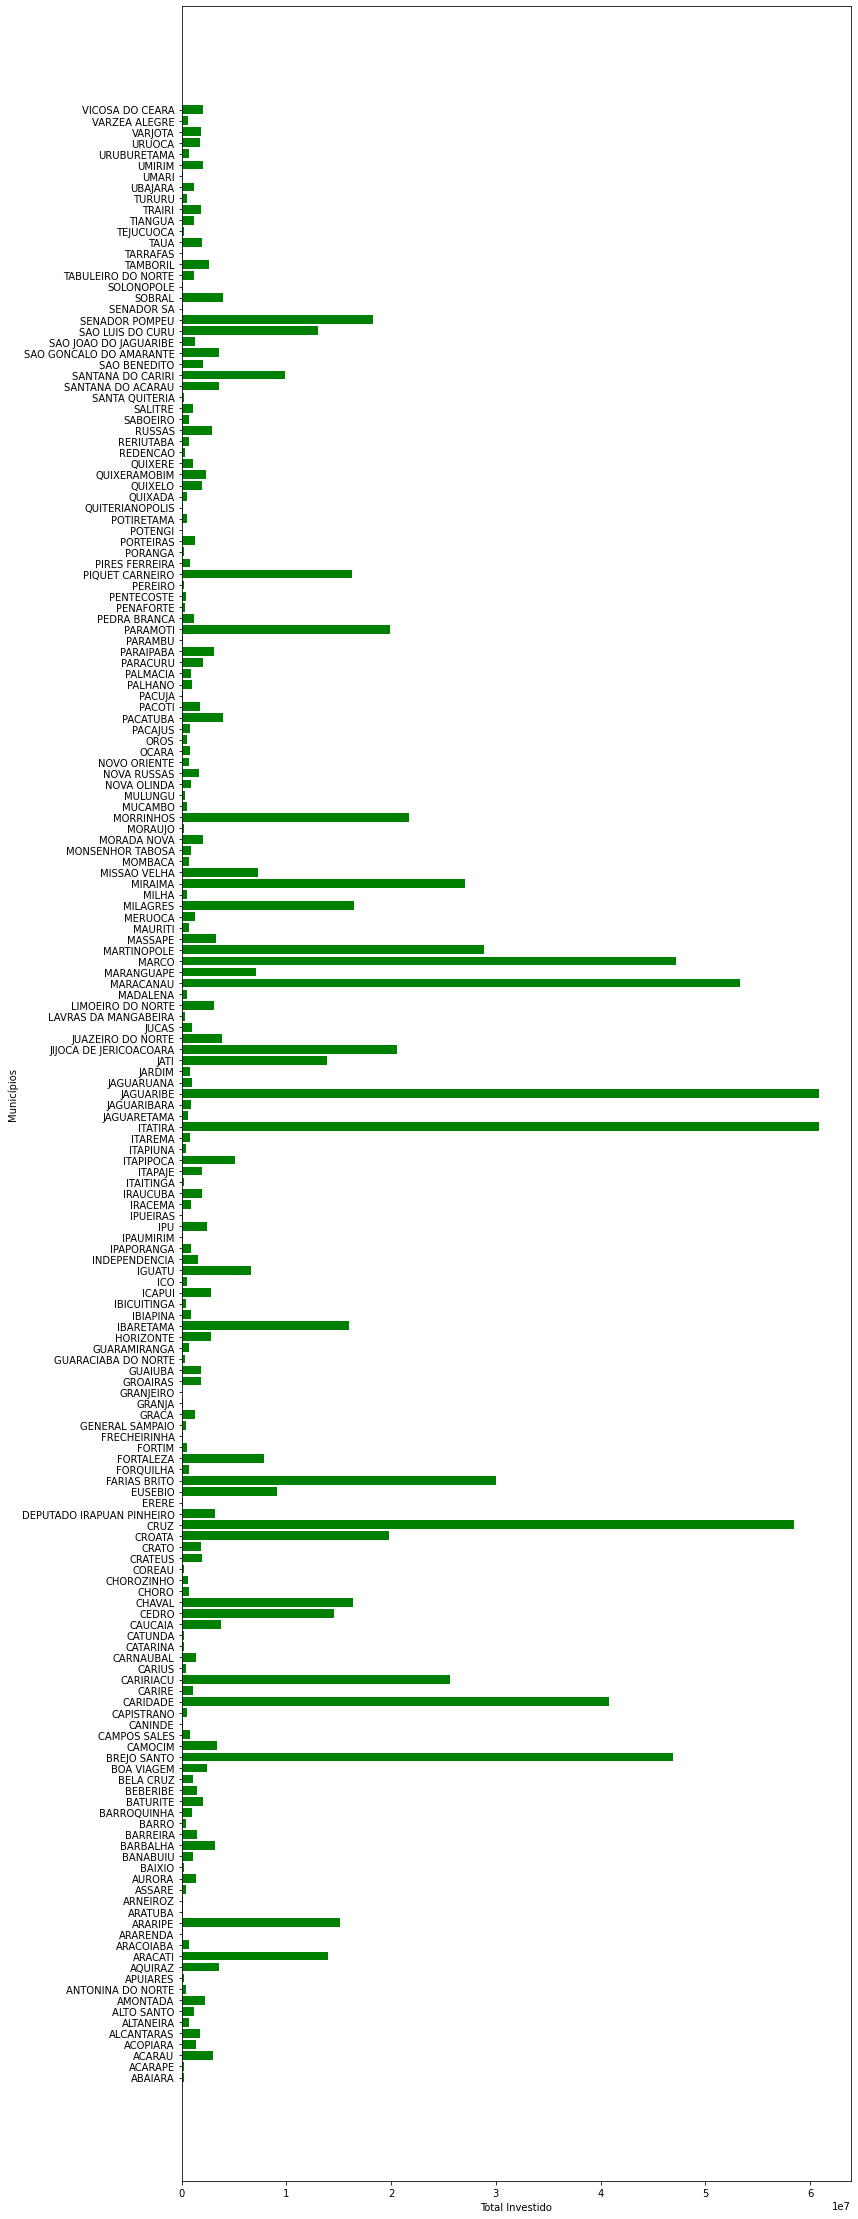

In [91]:
municipios = np.array(empenhos_agrupado_por_municipio['nome_municipio'])
empenhos = np.array(empenhos_agrupado_por_municipio['valor_empenhado'])

fig, ax1 = plt.subplots(figsize=(12, 40))  # Create the figure

# pos = np.arange(len(xa))
ax1.barh(municipios, empenhos, color="green")

ax1.set_ylabel("Municípios")
ax1.set_xlabel("Total Investido")
plt.show()

## Quantidades de valores totais dos empenhos por ano

> VALENDO

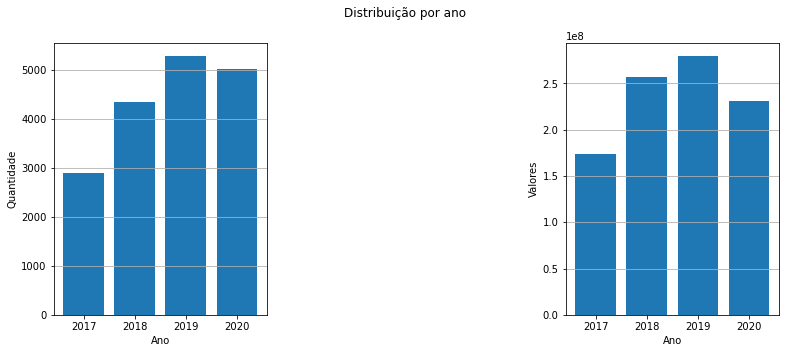

In [130]:
freq_year = dataset.groupby(["ano"]).size().reset_index(name="freq_year")

# PRIMEIRO GRÁFICO
xm = freq_year['ano']
ym = freq_year['freq_year']

plt.figure(figsize=(13, 5)) 
plt.subplot(1,3,1)
plt.bar(xm, ym)
plt.grid(axis = 'y')
plt.xlabel("Ano")
plt.ylabel("Quantidade")


# SEGUNDO GRÁFICO
sumarios = {'valor_empenhado': 'sum'}
total_por_ano = dataset.groupby(by = 'ano').agg(sumarios)


plt.subplot(1,3,3)
plt.bar(xm,total_por_ano['valor_empenhado'])
plt.grid(axis = 'y')
plt.xlabel("Ano")
plt.ylabel("Valores")


plt.suptitle("Distribuição por ano")

plt.show()

# Qual menor empenho?

In [163]:
dataset['valor_empenhado'].min()

0.54

# Qual maior empenho?

In [164]:
dataset['valor_empenhado'].max()

9000000.0

# Qual cidade emitiu o maior empenho

In [166]:
maiorEmpenho = dataset[dataset['valor_empenhado'] == dataset['valor_empenhado'].max()]
for i in range(maiorEmpenho.shape[0]):
    print('{} emitiu o MAIOR empenho com o valor de: R$ {}'.format(maiorEmpenho.iloc[i]['nome_municipio'],maiorEmpenho.iloc[i]['valor_empenhado']))

ITATIRA emitiu o MAIOR empenho com o valor de: R$ 9000000.0
JAGUARIBE emitiu o MAIOR empenho com o valor de: R$ 9000000.0


# Qual município investiu mais?

In [214]:
# dapm = dataset agrupado por municipio
dapm = dataset.groupby(by='nome_municipio').agg({'valor_empenhado':'sum'})
mun_mais_investiu = dapm[dapm['valor_empenhado']==dapm['valor_empenhado'].max()].reset_index()
# mun = dapm[dapm['valor_empenhado']==dapm['valor_empenhado'].max()]
print('{} foi o município que mais investiu. Total: R$ {}'.format(mun_mais_investiu.iloc[0]['nome_municipio'],mun_mais_investiu.iloc[0]['valor_empenhado']))

ITATIRA foi o município que mais investiu. Total: R$ 60864442.94


# Quais os 5 municipios que mais emitiram empenhos (quantidade)?



In [95]:
dataset['nome_municipio'].value_counts().head(5)

CARIDADE        623
ITATIRA         619
CARIRIACU       582
FARIAS BRITO    485
MARACANAU       461
Name: nome_municipio, dtype: int64

## Quais os 5 tipos de empenhos mais comuns?

> Aparentemente a maior parte dos gastos é com a própria organização ao invés de benefícios à comunidade

In [96]:
dataset['atividade_principal_texto'].value_counts()

Seguridade social obrigatória                                                                 1126
Distribuição de energia elétrica                                                               876
Captação, tratamento e distribuição de água                                                    782
Administração pública em geral                                                                 674
********                                                                                       627
                                                                                              ... 
Outras atividades profissionais, científicas e técnicas não especificadas anteriormente          1
Atividades de estudos geológicos                                                                 1
Instalação de portas, janelas, tetos, divisórias e armários embutidos de qualquer material       1
Comércio a varejo de motocicletas e motonetas novas                                              1
Fabricação

# Quais favorecidos receberam mais empenhos

In [223]:
dataset['numero_documento_negociante'].value_counts().head(20)

66666666666       1842
7047251000170      876
7040108000157      638
77777777777        316
29979036004219     243
29979036000140     196
33000118001574     191
7779242000174      180
191                131
33000118000179      99
7135601000150       94
29979036004480      81
29979036004308      76
360305000104        57
7605850000162       52
394460005887        47
1090080000186       46
11439609000188      45
29979036004995      42
29979036005452      42
Name: numero_documento_negociante, dtype: int64

In [224]:
# Existe correlação entre o codigo_elemento_despesa e o valor empenhado
# quanto maior o valor do empenho, mais o municipio duplica?

dataset[['codigo_elemento_despesa', 'valor_empenhado']].corr()

,codigo_elemento_despesa,valor_empenhado
codigo_elemento_despesa,1.000000,-0.086263
valor_empenhado,-0.086263,1.000000


In [105]:
#Salvando csv pré clean
dataset.to_csv('empenhos-pre.s',index=False)
# compression_opts = dict(method='zip', archive_name='out.csv')  
# df.to_csv('out.zip', index=False, compression=compression_opts)  